<a href="https://colab.research.google.com/github/WonderingRen/FreeLunch/blob/main/FreeLunch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

?FreeLunch asks the question of whether providing a free lunch for students helps them achieve better scores across the math, reading, and writing categories?

Labeled astudent data trains a multi-linear regression model to predict student scores.

Accuracy Metric: Mean squared error of the model on testing data.

Visualizations: Histograms showing distributions of data features and scatterplots demonstrating data correlations.

User interface: (New data → ML model → prediction) Via console the user can input unseen student data, and the model predicts a student’s score helping schoolteachers make better decisions on how to help students succeed.

Data comes from [Kagle](https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics)

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm

# Reloading the dataset. Use Raw format from GH
url = "https://raw.githubusercontent.com/WonderingRen/FreeLunch/main/StudentScoreData_Train.csv"
df = pd.read_csv(url) #read CSV into Python as a dataframe

The following cell takes an average of scores. What is a more elegant way to do it?!

In [8]:
df['score average'] = (df['math score'] + df['reading score'] + df['writing score'])/3

In [9]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average
0,female,group D,some college,standard,completed,59,70,78,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,84.666667
...,...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71,75.000000
996,male,group C,some college,standard,none,80,66,66,70.666667
997,female,group A,high school,standard,completed,67,86,86,79.666667
998,male,group E,high school,standard,none,80,72,62,71.333333


In [3]:
# split DataFrame using sample()
#df_split1 = df.sample(frac = 0.5)
#print(df_split)
#print(df_split.reset_index())
#df_split2 = df_split1.sample(frac = 0.5)

In [4]:
X = df.drop(columns=['Score Average']) #indpendent variables (features)
y = df[['Score Average']].copy() #dependent variables (labels)

In [4]:
df.describe(include='all')


,Student ID,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Score Average
count,207.000000,207,207,207,207,207,207.000000,207.000000,207.000000,207.000000
unique,NaN,2,5,6,2,2,NaN,NaN,NaN,NaN
top,NaN,Female,Group C,Some college,Yes,None,NaN,NaN,NaN,NaN
freq,NaN,105,76,61,141,112,NaN,NaN,NaN,NaN
mean,104.000000,NaN,NaN,NaN,NaN,NaN,69.207729,69.898551,68.971014,69.359098
std,59.899917,NaN,NaN,NaN,NaN,NaN,13.528838,14.960607,15.843259,14.525927
min,1.000000,NaN,NaN,NaN,NaN,NaN,38.000000,38.000000,35.000000,38.666667
25%,52.500000,NaN,NaN,NaN,NaN,NaN,59.500000,59.000000,57.000000,59.166667
50%,104.000000,NaN,NaN,NaN,NaN,NaN,69.000000,70.000000,70.000000,69.333333
75%,155.500000,NaN,NaN,NaN,NaN,NaN,79.000000,80.000000,80.000000,79.833333


In [7]:
#split the variable sets into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)

In [8]:
num_scores = df.groupby(by='Score Average').size();
display(num_scores); #another display option.

Score Average
38.666667    1
40.000000    1
40.666667    1
42.000000    1
42.333333    2
            ..
94.000000    4
94.333333    1
96.666667    1
98.333333    1
99.000000    1
Length: 114, dtype: int64

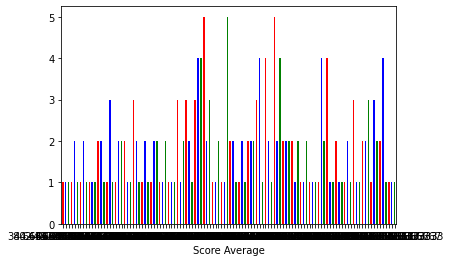

In [9]:
num_scores.plot.bar(color=['red','blue','green'],rot=0);

In [10]:
#displays
from IPython.display import display_html 
X_train_styler = X_train.head(20).style.set_table_attributes("style='display:inline'").set_caption('Independents variables')
y_train_styler = y_train.head(20).style.set_table_attributes("style='display:inline'").set_caption('Dependents variables')
space = "\xa0" * 10 #space between columns
display_html(X_train_styler._repr_html_()+ space  + y_train_styler._repr_html_(), raw=True)

,Student ID,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
116,117,Female,Group B,Some college,No,None,59,63,61
39,40,Male,Group E,High school,No,None,55,50,46
161,162,Male,Group C,Associate's degree,No,Completed,73,75,74
2,3,Female,Group B,Master's degree,No,Completed,90,95,93
101,102,Male,Group E,Some college,Yes,Completed,80,73,74
35,36,Female,Group D,Some high school,No,None,52,54,54
155,156,Male,Group D,Bachelor's degree,Yes,None,57,57,52
186,187,Female,Group D,Bachelor's degree,Yes,Completed,84,89,88
126,127,Female,Group B,Bachelor's degree,Yes,Completed,62,69,69
199,200,Male,Group C,High school,Yes,Completed,64,61,59


In [9]:
svm_model = svm.SVC(gamma='scale', C=1) #Creates a svm model object. Mote, 'scale' and 1.0 are gamma and C's respective defaults 
svm_model.fit(X_train,y_train) 

ValueError: ignored